<a href="https://colab.research.google.com/github/kmaha-lakshmi/ds_MahalakshmiKommoju/blob/main/Copy_of_ds_MahalakshmiKommoju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd

trades = pd.read_csv('/content/drive/MyDrive/ds_MahalakshmiKommoju/csv_files/historical_data.csv')

# See raw values before conversion
print(trades['Timestamp'].head(20))
print(trades.dtypes)


0     1.730000e+12
1     1.730000e+12
2     1.730000e+12
3     1.730000e+12
4     1.730000e+12
5     1.730000e+12
6     1.730000e+12
7     1.730000e+12
8     1.730000e+12
9     1.730000e+12
10    1.730000e+12
11    1.730000e+12
12    1.730000e+12
13    1.730000e+12
14    1.730000e+12
15    1.730000e+12
16    1.730000e+12
17    1.730000e+12
18    1.730000e+12
19    1.730000e+12
Name: Timestamp, dtype: float64
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


✅ Merge successful!
Date range: 2023-03-28 → 2025-06-15
Unique classifications: ['Greed' 'Fear' nan 'Extreme Greed' 'Neutral']
Non-null classifications: 184263


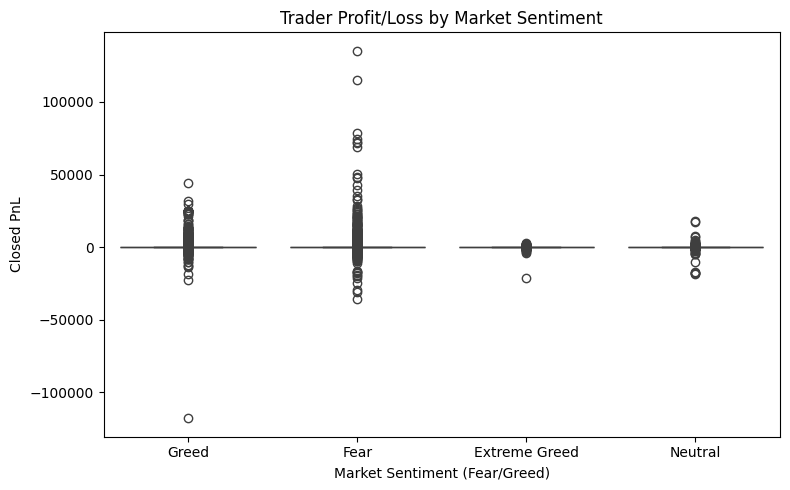

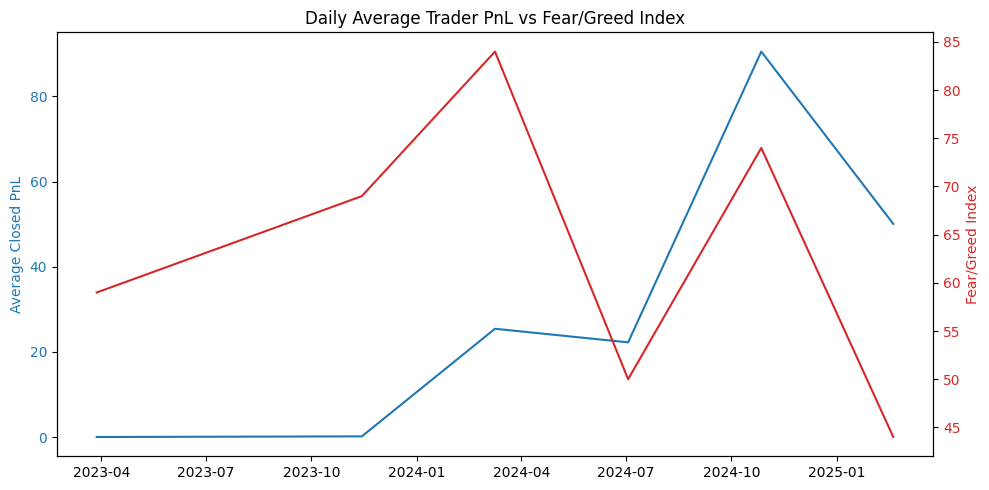

Trades: 2023-03-28 10:40:00 → 2025-06-15 15:06:40
FG: 2018-02-01 → 2025-05-02


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 📂 STEP 1 — Load Datasets
# ===============================
trades = pd.read_csv('/content/drive/MyDrive/ds_MahalakshmiKommoju/csv_files/historical_data.csv')
fg = pd.read_csv('/content/drive/MyDrive/ds_MahalakshmiKommoju/csv_files/fear_greed_index.csv')

# ===============================
# 🧹 STEP 2 — Convert timestamps properly
# ===============================
# Timestamp is in epoch milliseconds
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms', errors='coerce')

# Create daily date column for merging
trades['date'] = trades['Timestamp'].dt.date

# Fear/Greed: convert and clean
if 'date' in fg.columns:
    fg['date'] = pd.to_datetime(fg['date'], errors='coerce').dt.date
elif 'timestamp' in fg.columns:
    fg['date'] = pd.to_datetime(fg['timestamp'], errors='coerce').dt.date

# Rename classification for consistency
if 'classification' in fg.columns:
    fg.rename(columns={'classification': 'Classification'}, inplace=True)

# ===============================
# 🔗 STEP 3 — Merge Datasets
# ===============================
merged = pd.merge(trades, fg[['date', 'Classification', 'value']], on='date', how='left')

print("✅ Merge successful!")
print("Date range:", merged['date'].min(), "→", merged['date'].max())
print("Unique classifications:", merged['Classification'].unique())
print("Non-null classifications:", merged['Classification'].notna().sum())

# ===============================
# 📊 STEP 4 — Boxplot (PnL vs Sentiment)
# ===============================
cleaned = merged.dropna(subset=['Classification', 'Closed PnL'])

plt.figure(figsize=(8,5))
sns.boxplot(x='Classification', y='Closed PnL', data=cleaned)
plt.title('Trader Profit/Loss by Market Sentiment')
plt.xlabel('Market Sentiment (Fear/Greed)')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()

# ===============================
# 📈 STEP 5 — Daily Trend Analysis
# ===============================
daily_pnl = cleaned.groupby('date')['Closed PnL'].mean().reset_index()
daily_pnl.rename(columns={'Closed PnL': 'avg_pnl'}, inplace=True)

daily_sentiment = fg.groupby('date')['value'].mean().reset_index()
trend = pd.merge(daily_pnl, daily_sentiment, on='date', how='inner')

# Plot the trend
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(trend['date'], trend['avg_pnl'], color='tab:blue', label='Average PnL')
ax1.set_ylabel('Average Closed PnL', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(trend['date'], trend['value'], color='tab:red', label='Fear/Greed Index')
ax2.set_ylabel('Fear/Greed Index', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Daily Average Trader PnL vs Fear/Greed Index')
fig.tight_layout()
plt.show()

# ===============================
# ✅ STEP 6 — Verify date range
# ===============================
print("Trades:", trades['Timestamp'].min(), "→", trades['Timestamp'].max())
print("FG:", fg['date'].min(), "→", fg['date'].max())


In [15]:
import os

# Create the folder if it doesn't exist
os.makedirs('/content/drive/MyDrive/ds_MahalakshmiKommoju/outputs', exist_ok=True)
print("📁 Folder ready to save outputs!")


📁 Folder ready to save outputs!


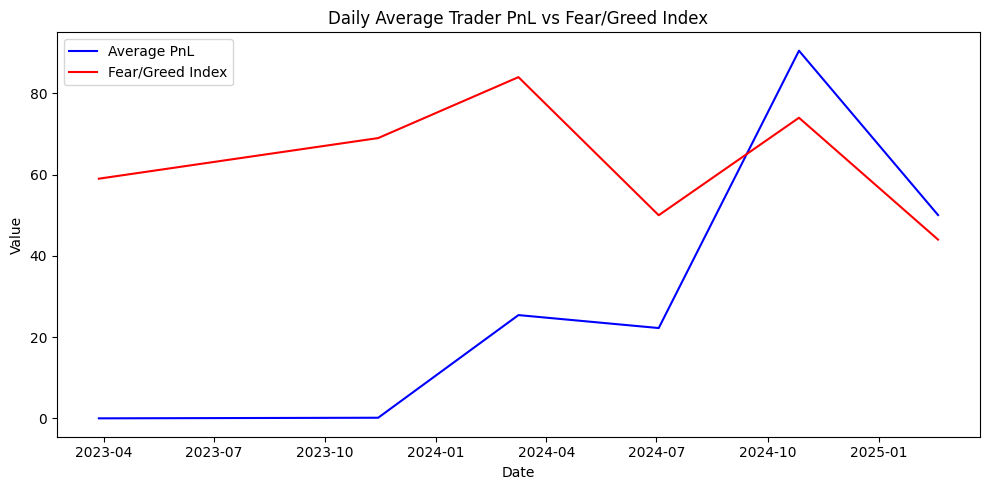

✅ Files saved to Drive: merged_trader_sentiment.csv & final_trend_plot.png


In [16]:
# Save processed and merged data
merged.to_csv('/content/drive/MyDrive/ds_MahalakshmiKommoju/outputs/merged_trader_sentiment.csv', index=False)

# Save the trend graph
plt.figure(figsize=(10,5))
plt.plot(trend['date'], trend['avg_pnl'], label='Average PnL', color='blue')
plt.plot(trend['date'], trend['value'], label='Fear/Greed Index', color='red')
plt.legend()
plt.title('Daily Average Trader PnL vs Fear/Greed Index')
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_MahalakshmiKommoju/outputs/final_trend_plot.png', dpi=150)
plt.show()

print("✅ Files saved to Drive: merged_trader_sentiment.csv & final_trend_plot.png")
